In [1]:
# Import libs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataframe

df = pd.read_csv(r"Data\student_habits_performance.csv")

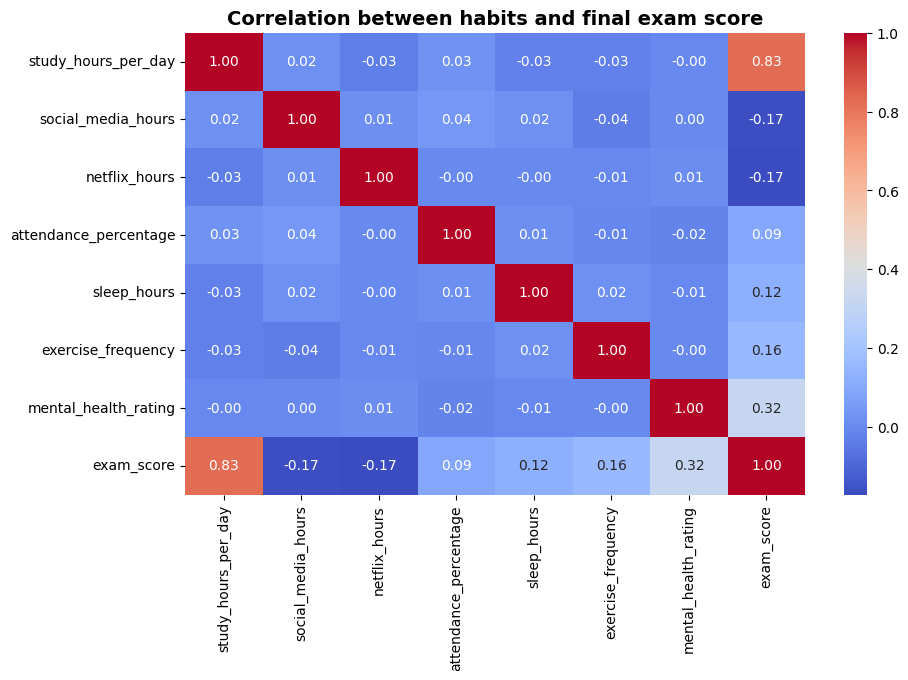

In [3]:
# Define relevant columns for correlation analysis
cols = [
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "attendance_percentage",
    "sleep_hours",
    "exercise_frequency",
    "mental_health_rating",
    "exam_score"
]

plt.figure(figsize=(10, 6))
sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between habits and final exam score", fontsize=14, fontweight="bold")
plt.show()

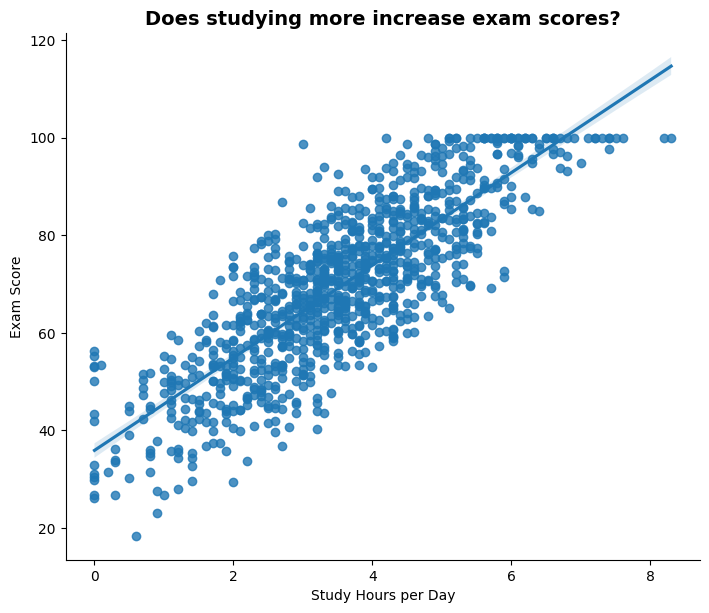

In [4]:
# Scatter plot with regression line
sns.lmplot(data=df, x="study_hours_per_day", y="exam_score", height=6, aspect=1.2)

plt.title("Does studying more increase exam scores?", fontsize=14, fontweight="bold")
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.show()

In [5]:
# Comparing average exam scores: students who study >5h vs <2h per day

# Filters
filter_study_high = df["study_hours_per_day"] > 5
filter_study_low = df["study_hours_per_day"] < 2

group_study_high = df[filter_study_high]["exam_score"]
group_study_low = df[filter_study_low]["exam_score"]

print("Average exam score (study > 5h/day):", group_study_high.mean())
print("Average exam score (study < 2h/day):", group_study_low.mean())

Average exam score (study > 5h/day): 90.79419354838709
Average exam score (study < 2h/day): 45.56390977443609


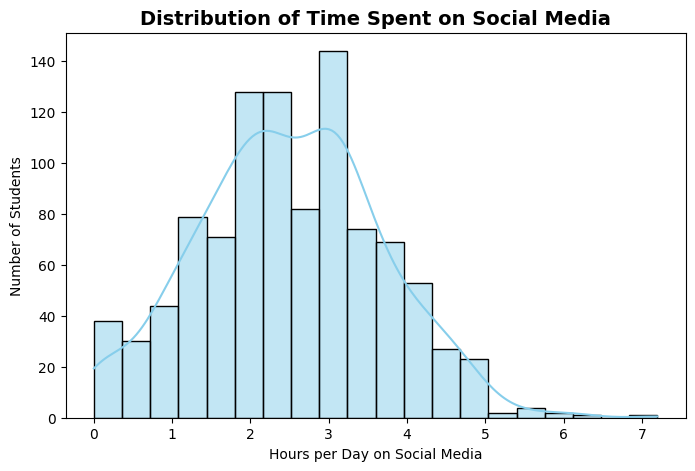

In [6]:
# Social Media Usage: Overall Distribution (Histogram)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="social_media_hours", bins=20, kde=True, color="skyblue")

plt.title("Distribution of Time Spent on Social Media", fontsize=14, fontweight="bold")
plt.xlabel("Hours per Day on Social Media")
plt.ylabel("Number of Students")
plt.show()

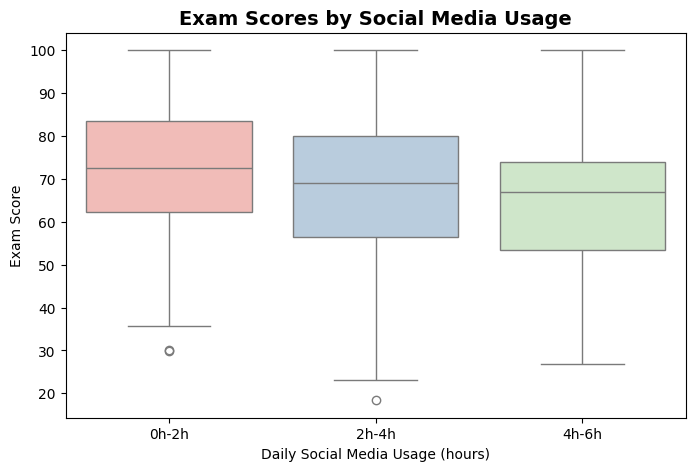

In [7]:
# Evaluating average exam scores by social media usage intervals

# Create categorical bins for social media usage
df["social_media_bin"] = pd.cut(
    df["social_media_hours"],
    bins=[0, 2, 4, 6],
    labels=["0h-2h", "2h-4h", "4h-6h"]
)

plt.figure(figsize=(8,5))
sns.boxplot(
    x="social_media_bin",
    y="exam_score",
    data=df,
    hue="social_media_bin",
    palette="Pastel1",
    legend=False
)


plt.title("Exam Scores by Social Media Usage", fontsize=14, fontweight="bold")
plt.xlabel("Daily Social Media Usage (hours)")
plt.ylabel("Exam Score")
plt.show()

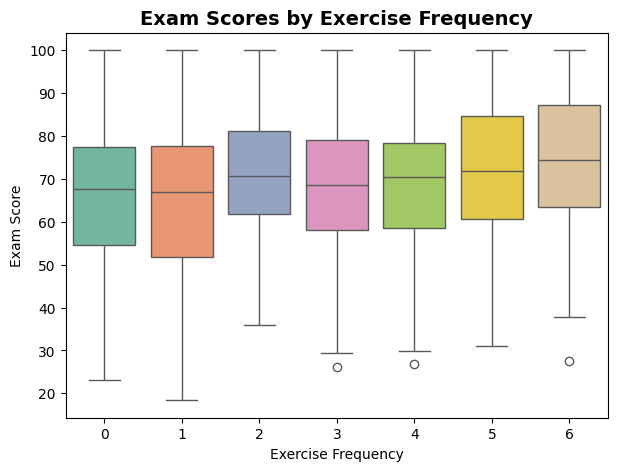

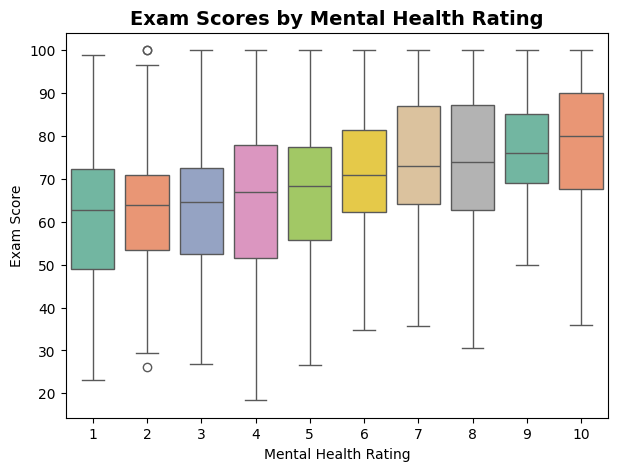

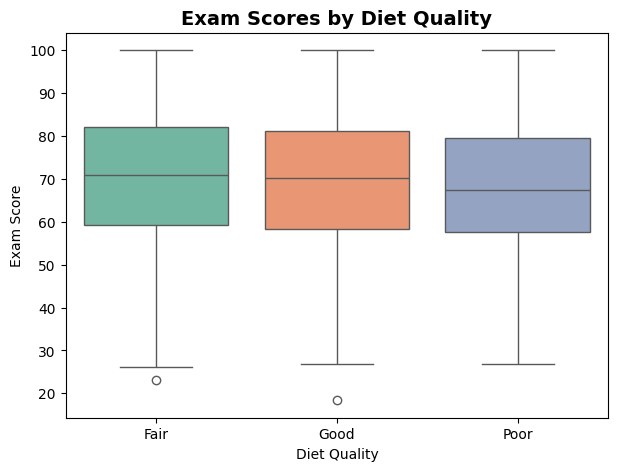

In [8]:
# Evaluating exam scores by healthy habits
for col in ("exercise_frequency", "mental_health_rating", "diet_quality"):
    plt.figure(figsize=(7,5))
    sns.boxplot(
        x=col,
        y="exam_score",
        data=df,
        hue=col,
        palette="Set2",
        legend=False
    )
    
    plt.title(f"Exam Scores by {col.replace('_', ' ').title()}", fontsize=14, fontweight="bold")
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Exam Score")
    plt.show()

In [9]:
# Exam score statistics by gender
gender_stats = df.groupby("gender")["exam_score"].agg(["mean", "std"]).reset_index()
gender_stats.columns = ["Gender", "Mean Exam Score", "Std Dev Exam Score"]
gender_stats

,Gender,Mean Exam Score,Std Dev Exam Score
0,Female,69.741372,16.899351
1,Male,69.368344,17.150875
2,Other,70.647619,13.755890


In [10]:
# Gender distribution
gender_distribution = df["gender"].value_counts(normalize=True).reset_index()
gender_distribution.columns = ["Gender", "Proportion"]

gender_distribution

,Gender,Proportion
0,Female,0.481
1,Male,0.477
2,Other,0.042
